In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../raw_data/sp500_stocks.csv')
df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2009-12-31,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
2,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
3,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
4,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0


In [52]:
df['Date'] = pd.to_datetime(df['Date'])
df_last_year = df[df['Date'] < pd.to_datetime('2021-12-31')]
df_last_year = df_last_year[df_last_year['Date'] > pd.to_datetime('2020-12-31')]

In [58]:
df_last_year = df_last_year[['Date','Symbol','Close']]
df_last_year

,Date,Symbol,Close
2774,2021-01-04,MMM,171.869995
2775,2021-01-05,MMM,171.580002
2776,2021-01-06,MMM,174.190002
2777,2021-01-07,MMM,169.720001
2778,2021-01-08,MMM,166.619995
...,...,...,...
1601890,2021-12-23,ZTS,242.509995
1601891,2021-12-27,ZTS,246.509995
1601892,2021-12-28,ZTS,244.250000
1601893,2021-12-29,ZTS,247.029999


In [82]:
symbols = df_last_year['Symbol'].unique()
variable_names = []
for symbol in symbols: 
    variable_names.append(f'{symbol}_df')

    
for i, symbol in enumerate(symbols):
    variable_names[i] = df_last_year[df_last_year['Symbol'] == symbol]
stock_dict = {}
for i, symbol in enumerate(symbols):
    stock_dict[symbol] = variable_names[i]  


In [83]:
stock_dict['ZTS']

,Date,Symbol,Close
1601644,2021-01-04,ZTS,163.589996
1601645,2021-01-05,ZTS,164.729996
1601646,2021-01-06,ZTS,167.149994
1601647,2021-01-07,ZTS,167.000000
1601648,2021-01-08,ZTS,168.110001
...,...,...,...
1601890,2021-12-23,ZTS,242.509995
1601891,2021-12-27,ZTS,246.509995
1601892,2021-12-28,ZTS,244.250000
1601893,2021-12-29,ZTS,247.029999


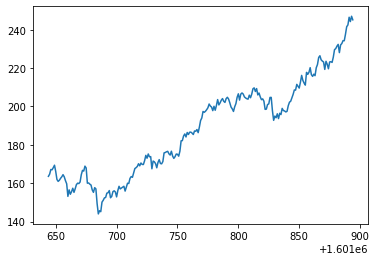

In [84]:
plt.plot(stock_dict['ZTS']['Close'])

In [95]:
stock_dict['ZTS'] ,stock_dict['MMM']
twoStocks = pd.merge(stock_dict['ZTS'] ,stock_dict['MMM'], on='Date')
twoStocks

,Date,Symbol_x,Close_x,Symbol_y,Close_y
0,2021-01-04,ZTS,163.589996,MMM,171.869995
1,2021-01-05,ZTS,164.729996,MMM,171.580002
2,2021-01-06,ZTS,167.149994,MMM,174.190002
3,2021-01-07,ZTS,167.000000,MMM,169.720001
4,2021-01-08,ZTS,168.110001,MMM,166.619995
...,...,...,...,...,...
246,2021-12-23,ZTS,242.509995,MMM,174.970001
247,2021-12-27,ZTS,246.509995,MMM,176.699997
248,2021-12-28,ZTS,244.250000,MMM,177.639999
249,2021-12-29,ZTS,247.029999,MMM,178.410004


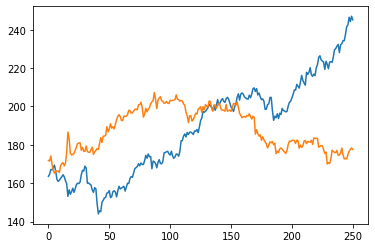

In [98]:
plt.plot(twoStocks[['Close_x','Close_y']])